In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 设置matplotlib正常显示中文和负号
# matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

## 计算最优案例数 

In [2]:
RLHH_file = "small_a=100_e=0.05_g=0.95_lr=0.1_seed=123_13.28-05.01"
baseline_filename="baseline_all"
h = pd.read_csv(f"../result/baseline/{baseline_filename}.csv")
if '.csv' in RLHH_file:
    hh = pd.read_csv(RLHH_file)
else:
    hh = pd.read_csv(f"../result/{RLHH_file}.csv")
hh['method'] = "RLHH"
# 计算 optval
hh["optval"] = hh.apply(lambda x: x.objval * (1 - x.gap), axis=1)

# 只比较 RLHH 中有的案例
h = pd.merge(h, hh[['instance', 'n', 'optval']], how='inner', on=['instance', 'n'])
hh = pd.merge(hh, h[['instance', 'n']].drop_duplicates(), how='inner', on=['instance', 'n'])

# 计算 gap
h["gap"] = h.apply(lambda x: 1 - x.optval / x.objval, axis=1)
h

,type,instance,n,method,iters,objval,time,optval,gap
0,c2,c208,28,BestEdges1,67,1450.3132,10.551422,184.925195,0.872493
1,c2,c208,28,BestEdges2,127,993.3873,5.660862,184.925195,0.813844
2,c2,c208,28,BestEdges3,72,1391.3514,6.814781,184.925195,0.867090
3,c2,c208,28,BestNodes,108,1408.2438,15.223595,184.925195,0.868684
4,c2,c208,28,BestPaths,91,1261.3643,33.674544,184.925195,0.853393
...,...,...,...,...,...,...,...,...,...
295,rc2,rc207,33,BestEdges2,70,2075.9260,67.252726,266.469902,0.871638
296,rc2,rc207,33,BestEdges3,43,2743.2434,110.953343,266.469902,0.902863
297,rc2,rc207,33,BestNodes,53,2591.1386,165.466635,266.469902,0.897161
298,rc2,rc207,33,BestPaths,71,2211.9591,389.341127,266.469902,0.879532


In [3]:
df = pd.concat([h, hh])
df = df[['type', 'instance', 'n', 'method', 'iters', 'objval', 'gap', 'time']]
if "type" not in df.columns or df["type"].isna().any():
    df["type"] = df['instance'].apply(lambda x: x[:-2])
df = df.sort_values(by=['n', 'instance', 'method'], ascending=True)
df

,type,instance,n,method,iters,objval,gap,time
66,c2,c201,25,BestEdges1,177,215.5428,-2.220446e-16,5.680874
67,c2,c201,25,BestEdges2,488,215.5428,-2.220446e-16,17.171874
68,c2,c201,25,BestEdges3,191,215.5428,-2.220446e-16,6.690113
69,c2,c201,25,BestNodes,322,215.5428,-2.220446e-16,15.764855
70,c2,c201,25,BestPaths,236,215.5428,-2.220446e-16,12.358012
...,...,...,...,...,...,...,...,...
254,rc2,rc208,34,BestEdges3,2,2838.1118,9.366222e-01,599.419495
255,rc2,rc208,34,BestNodes,35,2838.1118,9.366222e-01,177.699936
256,rc2,rc208,34,BestPaths,9,2679.9320,9.328814e-01,599.404537
257,rc2,rc208,34,Hyper,4,2779.6674,9.352897e-01,599.422016


In [4]:
def concat_rlhh(RLHH_file, baseline_filename):
	h = pd.read_csv(f"../result/baseline/{baseline_filename}.csv")
	if '.csv' in RLHH_file:
		hh = pd.read_csv(RLHH_file)
	else:
		hh = pd.read_csv(f"../result/{RLHH_file}.csv")
	hh['method'] = "RLHH"
	# 计算 optval
	hh["optval"] = hh.apply(lambda x: x.objval * (1 - x.gap), axis=1)

	# 只比较 RLHH 中有的案例
	h = pd.merge(h, hh[['instance', 'n', 'optval']], how='inner', on=['instance', 'n'])
	hh = pd.merge(hh, h[['instance', 'n']].drop_duplicates(), how='inner', on=['instance', 'n'])

	# 计算 gap
	h["gap"] = h.apply(lambda x: 1 - x.optval / x.objval, axis=1)
	

	df = pd.concat([h, hh])
	if "type" not in df.columns or df["type"].isna().any():
		df["type"] = df['instance'].apply(lambda x: x[:-2])
	df = df[['type', 'instance', 'n', 'method', 'iters', 'objval', 'gap', 'time']]
	df = df.sort_values(by=['n', 'instance', 'method'], ascending=True)
	df['objval'] = df['objval'].apply(lambda x: round(x, 1))
	df['time'] = df['time'].apply(lambda x: round(x, 2))
	return df

In [5]:
def count(df, group_by):
	df_count = df[['instance', 'method', group_by]].groupby([group_by, 'method'], as_index=False).count()
	df_count = df_count.pivot(group_by, 'method', 'instance')
	df_count.fillna(0, inplace=True)

	df_count['sum'] = df_count.sum(axis=1)
	df_count.loc['sum'] = df_count.sum(axis=0)
	df_count = df_count.astype(int)

	return df_count

In [6]:
RLHH_file = "large_r_a=100_e=0.05_g=0.95_lr=0.01_seed=523_17.19-11.04"
baseline_filename="large_instances_to_r2_100"
df = concat_rlhh(RLHH_file, baseline_filename)
df = pd.concat([df[df["type"] == 'r1'], df[df["type"] == 'r2']])

In [7]:
pd.set_option("display.width", 150)

In [8]:
# 先比最优值，再比速度
df_best_fast = df.sort_values(by=['objval', 'time'], ascending=True)
df_best_fast = df_best_fast.groupby(['instance', 'type', 'n']).head(1)
best_fast_count = count(df_best_fast, group_by='n')
print(best_fast_count)
print(best_fast_count.to_latex())
# print(best_fast_count.T.to_latex())


method  BestEdges1  BestEdges2  BestEdges3  BestNodes  BestPaths  Hyper  RLHH  sum
n                                                                                 
50               4           7           0          2          2      1     7   23
75               1           5           3          1          5      4     4   23
100              4           2           3          1          7      3     3   23
sum              9          14           6          4         14      8    14   69
\begin{tabular}{lrrrrrrrr}
\toprule
method &  BestEdges1 &  BestEdges2 &  BestEdges3 &  BestNodes &  BestPaths &  Hyper &  RLHH &  sum \\
n   &             &             &             &            &            &        &       &      \\
\midrule
50  &           4 &           7 &           0 &          2 &          2 &      1 &     7 &   23 \\
75  &           1 &           5 &           3 &          1 &          5 &      4 &     4 &   23 \\
100 &           4 &           2 &           3 &          1

In [9]:
# 最优值比较
df_best = df.groupby(['instance', 'n']).apply(lambda t: t[t.objval==t.objval.min()]).reset_index(drop=True)
best_count = count(df_best, group_by='n')
best_count['sum'] = best_fast_count['sum']
print(best_count)
# print(best_count.to_latex())
# print(best_count.T.to_latex())

method  BestEdges1  BestEdges2  BestEdges3  BestNodes  BestPaths  Hyper  RLHH  sum
n                                                                                 
50               5           9           2          4          4      1     7   23
75               4           8           4          4          6      4     6   23
100              4           2           3          1          7      3     3   23
sum             13          19           9          9         17      8    16   69


In [89]:
# 速度比较
df_fast = df.groupby(['instance', 'n']).apply(lambda t: t[t.time == t.time.min()]).reset_index(drop=True)
fast_count = count(df_fast, group_by='n')
fast_count

method,BestEdges1,BestEdges2,BestEdges3,Hyper,RLHH,sum
n,,,,,,
50,2,3,1,6,0,12
75,0,1,0,9,2,12
100,0,3,0,5,4,12
sum,2,7,1,20,6,36


In [14]:
fast_count

13

In [ ]:
print(best_fast_count.T.to_latex())

In [ ]:
print(best_count.T.to_latex())

### 详细数据对比

In [137]:
def preprocess(df):
    df = df[df['method'] != 'excat']
    df['objval'] = df['objval'].apply(lambda x: round(x, 2))
    df['time'] = df['time'].apply(lambda x: round(x, 2))
    if "type" not in df.columns:
        df["type"] = df['instance'].map(lambda x: x[:-2])
    return df

In [140]:
h = pd.read_csv("../result/baseline/heuristic.csv")
rl = pd.read_csv("../result/test_small_MLP_entropy_17.19-11.04.csv")
h = preprocess(h)
rl = preprocess(rl)
h = h[h["type"] == "r2"]
index = h.loc[h["method"] == "BestEdges1", ["instance", "n"]].values
h1 = h.loc[h["method"] == "BestEdges1", ["objval", "time"]].values
h2 = h.loc[h["method"] == "BestEdges2", ["objval", "time"]].values
h3 = h.loc[h["method"] == "BestEdges3", ["objval", "time"]].values
h4 = h.loc[h["method"] == "BestNodes", ["objval", "time"]].values
h5 = h.loc[h["method"] == "BestPaths", ["objval", "time"]].values
hh = h.loc[h["method"] == "Hyper", ["objval", "time"]].values
rl = rl.loc[rl["type"] == "r2", ["objval", "time"]].values

<ipython-input-137-2b8374c5c83a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['objval'] = df['objval'].apply(lambda x: round(x, 2))
<ipython-input-137-2b8374c5c83a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].apply(lambda x: round(x, 2))
<ipython-input-137-2b8374c5c83a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [142]:
df = pd.DataFrame(
    np.concatenate([index, h1, h2, h3, h4, h5, hh, rl], axis=1), 
    columns=[['', '', 'BE1', 'BE1', 'BE2', 'BE2', 'BE3', 'BE3', 'BN', 'BN', 'BP', 'BP', 'HH', 'HH', 'RLHH', 'RLHH'], ["instance", "n"] + ["obj", "time"]*7])
# [i for item in [[f"h{i}"]*2 for i in range(1,6)] for i in item]
df

BE1              BE2              BE3               BN  \
   instance   n      obj    time      obj    time      obj    time      obj   
0      r203  25   669.77   12.45   669.04   58.11    768.3   67.23    689.0   
1      r202  30   440.98   12.95   522.45   64.56   509.47   14.42   516.33   
2      r201  27   520.28    4.76   506.05    5.42   506.71    6.82   506.05   
3      r209  31   715.36   12.12   788.04   21.63   858.35   80.76   820.94   
4      r208  28  1291.17  599.52  1113.49  539.96  1291.17  599.49  1291.17   
5      r204  32  1504.75  599.51   1221.9   31.13  1504.75  599.44  1504.75   
6      r202  25   559.35     6.1   499.75   11.13   550.35   12.03   543.28   
7      r211  34  1151.35  161.44  1210.89    69.9  1626.38  599.42  1352.74   
8      r209  25   821.21    4.76   739.32   16.45  1121.88   47.08   917.29   
9      r208  28  1291.17  599.51  1113.49  536.33  1291.17  599.49  1291.17   
10     r202  27   490.71    9.25   463.77   21.96   577.41    9.01   549.26   
11     r210  28   786.53   11.38   660.88   34.17   903.06   16.56   847.16   
12     r211  26  1018.51   92.42  1085.38  157.85  1268.52  599.52  1253.23   
13     r202  28   534.73   10.32   543.75   45.73   537.56   12.55   468.72   
14     r209  26   627.79     7.1   766.72   10.19   723.77    49.9   760.53   
15     r210  28   786.53   11.29   660.88    34.0   903.06   16.11   845.52   
16     r201  32    583.4     6.8   545.18    12.0   573.84    8.12   545.12   

                 BP               HH             RLHH         
      time      obj    time      obj    time      obj   time  
0    79.19   714.12  255.53   724.06  123.23   520.25  45.71  
1    44.53   639.64   62.31   460.19   11.85   480.86  28.15  
2     8.24   507.69   11.04   559.04    6.62   504.17   7.31  
3    31.71  1160.49  132.34   877.18   39.53   819.72   7.39  
4   599.51  1232.41  599.48  1155.43  381.84  1200.78   3.85  
5   599.46  1408.62  599.45  1469.72  599.45  1139.31   7.85  
6    22.43   552.21   29.45  1022.81   10.44   496.58  12.88  
7   326.43  1488.33  599.41  1591.35  599.47  1467.85   6.65  
8    12.28   868.09   63.44   809.54     5.0   643.02   6.91  
9   599.51  1232.41   599.5  1256.13  599.49  1200.78   3.87  
10   34.08   684.89   52.57   991.85   27.22   533.66  13.71  
11   40.39   775.87   74.91   648.06    9.12   677.92   4.83  
12  129.05  1148.47  242.37  1241.78   98.32  1007.23   2.09  
13   53.38   526.55   52.71   968.57    6.96   456.28  29.68  
14    14.0   747.84   75.88  1201.03    4.56   784.66   8.94  
15   22.91   775.87   74.02   890.44    5.81   677.92   4.79  
16   14.94   564.58   22.84   563.13    7.32   561.28  10.55

In [156]:
# df.to_csv("../result/result_xiangxi.csv", index=False)

In [145]:
print(df.to_latex())

\begin{tabular}{lllllllllllllllll}
\toprule
{} & \multicolumn{2}{l}{BE1} & \multicolumn{2}{l}{BE2} & \multicolumn{2}{l}{BE3} & \multicolumn{2}{l}{BN} & \multicolumn{2}{l}{BP} & \multicolumn{2}{l}{HH} & \multicolumn{2}{l}{RLHH} \\
{} & instance &   n &      obj &    time &      obj &    time &      obj &    time &      obj &    time &      obj &    time &      obj &    time &      obj &   time \\
\midrule
0  &     r203 &  25 &   669.77 &   12.45 &   669.04 &   58.11 &    768.3 &   67.23 &    689.0 &   79.19 &   714.12 &  255.53 &   724.06 &  123.23 &   520.25 &  45.71 \\
1  &     r202 &  30 &   440.98 &   12.95 &   522.45 &   64.56 &   509.47 &   14.42 &   516.33 &   44.53 &   639.64 &   62.31 &   460.19 &   11.85 &   480.86 &  28.15 \\
2  &     r201 &  27 &   520.28 &    4.76 &   506.05 &    5.42 &   506.71 &    6.82 &   506.05 &    8.24 &   507.69 &   11.04 &   559.04 &    6.62 &   504.17 &   7.31 \\
3  &     r209 &  31 &   715.36 &   12.12 &   788.04 &   21.63 &   858.35 &   80.76 & 

## 读取tensorboard数据-test

In [1]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 设置matplotlib正常显示中文和负号
# matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

import numpy as np

In [2]:
from tensorboard.backend.event_processing import event_accumulator
 
#加载日志数据
ea=event_accumulator.EventAccumulator('../D3QN/one/tensorboard_logs/a=100_e=0.05_g=0.95_lr=0.1_seed=123_10.30-05.15') 
ea.Reload()
print(ea.scalars.Keys())

['1_gap', '2_episode_rewards', '3_max_q', '4_objval', '5_episode_losses', '6_iters']


In [3]:
objval = [i.value for i in ea.scalars.Items('4_objval')]
n_step = len(objval)

In [4]:
def draw_train(objval):
    n_step = len(objval)
    plt.style.use("seaborn-darkgrid")
    plt.figure()
    plt.plot(range(n_step), objval, 'r', label='RLHH')
    plt.plot(range(n_step), [511.2593]*n_step, label='BE1')
    plt.plot(range(n_step), [522.5584]*n_step, label='BE2')
    plt.plot(range(n_step), [547.5779]*n_step, label='BE3')
    plt.plot(range(n_step), [520.4402]*n_step, label='BN')
    plt.plot(range(n_step), [587.5677]*n_step, label='BP')
    plt.plot(range(n_step), [579.6721]*n_step, label='HH')
    plt.legend(loc="center right")
    plt.xlabel("episode")
    plt.ylabel("objval")
    # plt.savefig("F:/Users/Documents/汇报/img/train_r201_30.png", dpi=300)
    plt.show()

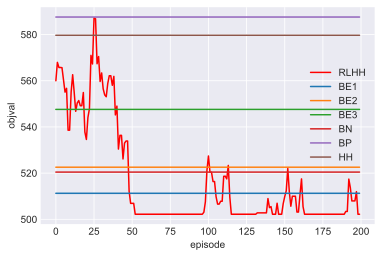

In [136]:
np.random.seed(523)
n_step = 200
optval = 509.0155 * (1-0.0134)
increment = np.random.normal(-0.2, 9, n_step)
increment[np.random.choice(range(1, n_step), 42)] = 0
objval = np.array([max(optval, 560 + sum(increment[:i])) for i in range(n_step)])
draw_train(objval)

## 不同方法结果比较

In [202]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 设置matplotlib正常显示中文和负号
# matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

### 运行过程图

In [67]:
import pandas as pd
import numpy as np
plt.style.use("seaborn-darkgrid")

In [78]:
f = open("../result/detail/r102_50.txt", 'r')
lines = f.readlines()
lines = [line.split("\n")[0] for line in lines]
array = [[info.split(":")[1] for info in line.split(', ')] for line in lines]
columns = [info.split(":")[0] for info in lines[0].split(', ')]
df = pd.DataFrame(data=array, columns=columns)
df[["reward", "objval", "time"]] = df[["reward", "objval", "time"]].astype('float64')
df

,t,reward,done,objval,heuristic,time
0,1,1.0,False,2579.4620,BestEdges2,0.727084
1,2,1.0,False,2292.9964,BestEdges2,0.762993
2,3,1.0,False,2144.3759,BestEdges2,0.796899
3,4,1.0,False,1926.0086,BestEdges2,0.831776
4,5,1.0,False,1729.1313,BestEdges2,0.865686
...,...,...,...,...,...,...
231,232,0.0,False,911.4426,BestEdges3,19.721286
232,233,-1.0,False,911.4426,Exact,19.872881
233,234,0.0,False,911.4426,BestEdges3,20.007521
234,235,-1.0,False,911.4426,BestEdges3,20.390497


Text(0, 0.5, 'objval')

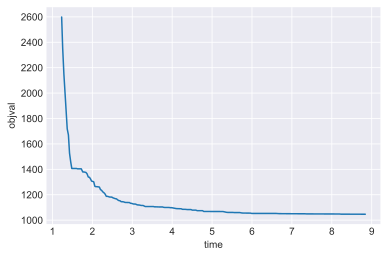

In [160]:
plt.plot(df['time'], df['objval'])
plt.xlabel("time")
plt.ylabel("objval")
# plt.savefig("../test_tight.png", dpi=300, bbox_inches="tight")

In [68]:
f = open("../result/test.txt") 
line = f.readline()   # 每次读取一行内容
data = {}
while line:
    if "heuristic" in line:
        method = line.split(":  ")[-1][:-1]
        objval = []
        time = []
    elif "iteration" in line:
        info = line[:-1].split(", ")
        objval.append(float(info[1]))
        time.append(float(info[2]))
    else:
        data[method] = {"objval": objval, "time": time}
    line = f.readline()


In [69]:
data.keys()

dict_keys(['BestEdges1', 'BestEdges2', 'BestEdges3', 'BestNodes', 'BestPaths', 'Hyper'])

In [70]:
data["BestEdges1"].keys()

dict_keys(['objval', 'time'])

In [18]:
colors = ['blue', 'brown', 'gray', 'green', 'orange', 'red']    #'pink'
markers = ['o', 'v', '^', '+', 'x', 's']    # '*'
methods = {
    "BestEdges1": "BE1",
    "BestEdges2": "BE2",
    "BestEdges3": "BE3",
    "BestNodes": "BN",
    "BestPaths": "BP",
    # "Hyper": "HH",
    "RLHH": "RLHH"
}

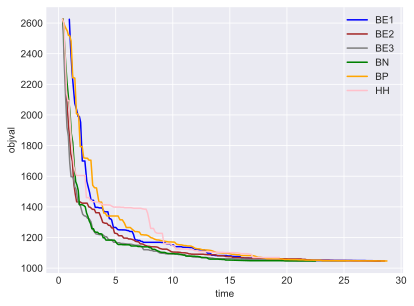

In [73]:
for i, method in enumerate(data.keys()):
    info = data[method]
    plt.plot(info['time'], info['objval'], colors[i], 
            # marker=markers[i], 
            label=methods[method], )
# plt.plot(df['time'], df['objval'], 'red', label="RLHH")

plt.xlabel("time")
plt.ylabel("objval")
plt.legend()
# plt.savefig("F:/Users/Documents/汇报/img/iteration.png", dpi=300)

In [19]:
def load_rlhh(rlhh_file):
    f = open(rlhh_file, 'r')
    lines = f.readlines()
    lines = [line.split("\n")[0] for line in lines]
    array = [[info.split(":")[1] for info in line.split(', ')] for line in lines]
    columns = [info.split(":")[0] for info in lines[0].split(', ')]
    df = pd.DataFrame(data=array, columns=columns)
    df[["reward", "objval", "time"]] = df[["reward", "objval", "time"]].astype('float64')
    return df   # [:-int(len(df)/2.5)]
    
def load_baseline(base_file):
    f = open(base_file, 'r')
    line = f.readline()   # 每次读取一行内容
    data = {}
    while line:
        if "heuristic" in line:
            method = line.split(":  ")[-1][:-1]
            objval = []
            time = []
        elif "iteration" in line:
            info = line[:-1].split(", ")
            objval.append(float(info[1]))
            time.append(float(info[2]))
        else:
            data[method] = {"objval": objval, "time": time}
        line = f.readline()
    return data

In [25]:
def draw_iteration_process(ax, instance):
    base_file = f"../result/detail/log_{instance}.txt"
    rlhh_file = f"../result/detail/RLHH_log_{instance}.txt"
    data = load_baseline(base_file)
    df = load_rlhh(rlhh_file)
    for i, method in enumerate(data.keys()):
        if method == 'Hyper':
            continue
        info = data[method]
        if (instance == "r201_100" and method == "BestEdges2"):
            ax.plot(df['time'], df['objval'], 'brown', label="BE2")
        else:
            ax.plot(info['time'], info['objval'], colors[i], label=methods[method])
    if (instance == "r201_100"):
        ax.plot(data["BestEdges2"]['time'], data["BestEdges2"]['objval'], 'red', label="RLHH")
    else:
        ax.plot(df['time'], df['objval'], 'red', label="RLHH")

    ax.set_xlabel("time")
    # plt.yticks([]) # 隐藏y坐标轴
    ax.axes.yaxis.set_ticklabels([]) # 隐藏y坐标轴
    ax.set_ylabel("ObjVal")
    ax.legend()

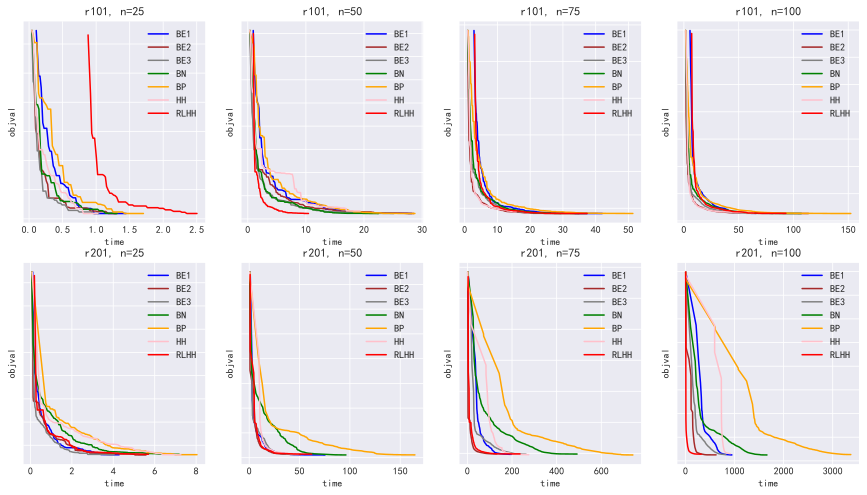

In [189]:
prob_types = ['r1', 'r2']   # ['c1', 'c2', 'r1', 'r2', 'rc1', 'rc2']
Nums = [25, 50, 75, 100]
nrows = len(prob_types)
ncols = len(Nums)
fig, axes = plt.subplots(nrows, ncols)
plt.rcParams['figure.figsize']=(15, 4*nrows)
for i, prob_type in enumerate(prob_types):
    for j, customerNum in enumerate(Nums):
        instance = f"{prob_type}01_{customerNum}"
        draw_iteration_process(axes[i][j], instance)
        axes[i][j].set_title(f"{prob_type}01, n={customerNum}")


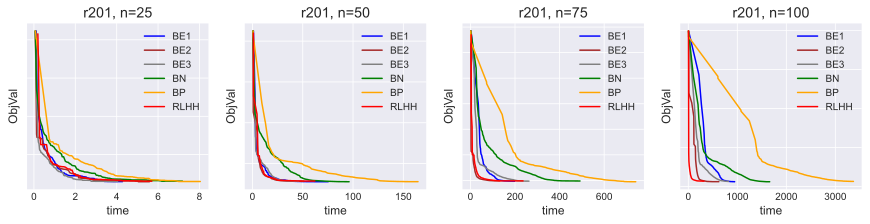

In [26]:
prob_types = ['r2']   # ['c1', 'c2', 'r1', 'r2', 'rc1', 'rc2']
Nums = [25, 50, 75, 100]
nrows = len(prob_types)
ncols = len(Nums)
fig, axes = plt.subplots(nrows, ncols)
plt.rcParams['figure.figsize']=(15, 3*nrows)
for j, customerNum in enumerate(Nums):
    instance = f"r201_{customerNum}"
    draw_iteration_process(axes[j], instance)
    axes[j].set_title(f"r201, n={customerNum}")
plt.savefig("F:/Users/Documents/汇报/img/vrptw_iteration_process.png", dpi=400, bbox_inches="tight")

### 所有案例结果

In [2]:
import pandas as pd
import numpy as np
plt.style.use("seaborn-darkgrid")

In [223]:
# df = pd.read_csv("../result/detail/large_r_a=100_e=0.05_g=0.95_lr=0.01_seed=523_17.19-11.04.csv")
# RLHH_file = "large_r_a=100_e=0.05_g=0.95_lr=0.01_seed=523_17.19-11.04"
RLHH_file = "test_small_MLP_entropy_17.19-11.04"
baseline_filename="heuristic"
df = concat_rlhh(RLHH_file, baseline_filename)
df

,No.,type,instance,n,method,iters,objval,gap,time
60,12,c2,c201,25,BestEdges1,177,215.5,0.000000,5.68
61,12,c2,c201,25,BestEdges2,488,215.5,0.000000,17.17
62,12,c2,c201,25,BestEdges3,191,215.5,0.000000,6.69
63,12,c2,c201,25,BestNodes,322,215.5,0.000000,15.76
64,12,c2,c201,25,BestPaths,236,215.5,0.000000,12.36
...,...,...,...,...,...,...,...,...,...
230,43,rc2,rc208,34,BestEdges3,2,2838.1,0.936622,599.42
231,43,rc2,rc208,34,BestNodes,35,2838.1,0.936622,177.70
232,43,rc2,rc208,34,BestPaths,9,2679.9,0.932881,599.40
233,43,rc2,rc208,34,Hyper,4,2779.7,0.935290,599.42


In [225]:
df['n'] = df['n'].apply(lambda x: (x // 10) * 10)
df[['gap', 'method', 'type', 'n']].groupby(['type', 'n', 'method'], as_index=False).max()

,type,n,method,gap
0,c2,20,BestEdges1,0.872493
1,c2,20,BestEdges2,0.813844
2,c2,20,BestEdges3,0.867090
3,c2,20,BestNodes,0.868684
4,c2,20,BestPaths,0.853393
5,c2,20,Hyper,0.851777
6,c2,20,RLHH,0.790604
7,c2,30,BestEdges1,0.883194
8,c2,30,BestEdges2,0.819262
9,c2,30,BestEdges3,0.885032


In [230]:
def draw_instances(df):
    # df = df[['gap', 'method', 'type', 'n']].groupby(['type', 'n', 'method'], as_index=False).mean()
    plt.figure(figsize=(15, 5))
    for i, method in enumerate(df["method"].unique()):
        obj = df[df["method"] == method]["gap"]
        plt.plot(
            list(range(len(obj))), 
            [y * 100 for y in obj], 
            colors[i], 
            marker=markers[i], 
            label=methods[method], 
            alpha=0.7
        )
    # 修改坐标轴字体及大小
    plt.yticks(fontproperties='Times New Roman', size=12, weight='bold')#设置大小及加粗
    plt.xticks(fontproperties='Times New Roman', size=12, weight='bold')

    plt.xlabel("Instance number", fontsize=12, fontweight='bold')
    plt.ylabel("GAP(%)", fontsize=12, fontweight='bold')
    plt.legend()
    # plt.savefig("F:/Users/Documents/汇报/img/instance_gap_test_r2.png", dpi=400, bbox_inches="tight")

   type   n      method       gap
0    c2  30  BestEdges1  0.368116
1    c2  30  BestEdges2  0.450748
2    c2  30  BestEdges3  0.429236
3    c2  30   BestNodes  0.403713
4    c2  30   BestPaths  0.386424
5    c2  30       Hyper  0.598581
6    c2  30        RLHH  0.453338
7    r2  30  BestEdges1  0.451629
8    r2  30  BestEdges2  0.445505
9    r2  30  BestEdges3  0.498119
10   r2  30   BestNodes  0.473700
11   r2  30   BestPaths  0.507717
12   r2  30       Hyper  0.552301
13   r2  30        RLHH  0.429931
14  rc2  30  BestEdges1  0.807590
15  rc2  30  BestEdges2  0.774712
16  rc2  30  BestEdges3  0.820750
17  rc2  30   BestNodes  0.806507
18  rc2  30   BestPaths  0.805618
19  rc2  30       Hyper  0.785541
20  rc2  30        RLHH  0.792125


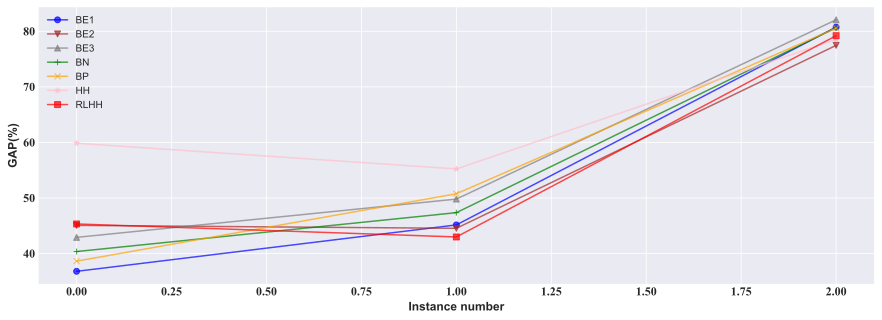

In [231]:
draw_instances(df)  # [df['type'] == 'r1']

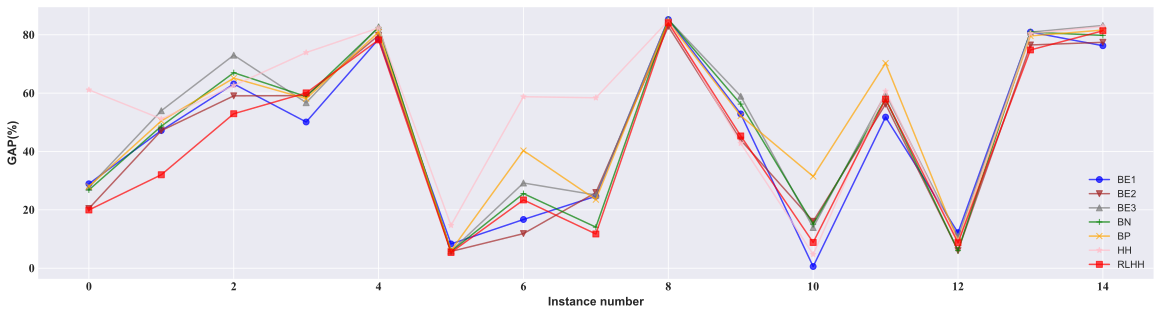

In [203]:
draw_instances(df[df['type'] == 'r2'])

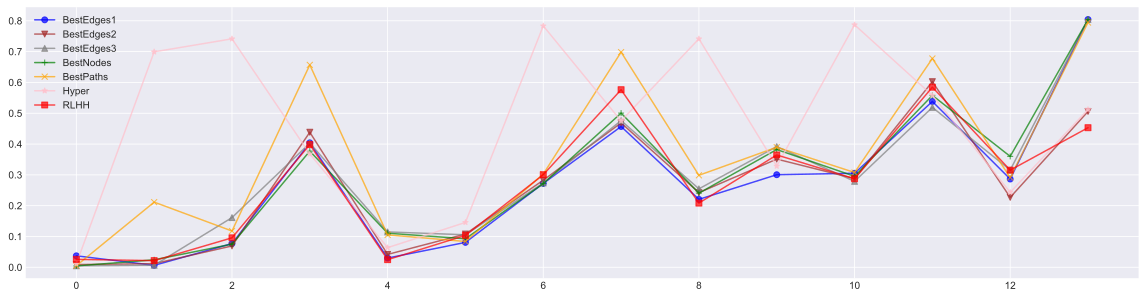

In [114]:
# draw_instances(df[df['n'] == 100])

### GAP calculate

In [1]:
import pandas as pd
import numpy as np

In [2]:
def concat_rlhh(RLHH_file, baseline_filename):
    h = pd.read_csv(f"../result/baseline/{baseline_filename}.csv")
    if '.csv' in RLHH_file:
        hh = pd.read_csv(RLHH_file)
    else:
        hh = pd.read_csv(f"../result/{RLHH_file}.csv")
    hh['method'] = "RLHH"
    # 计算 optval
    hh["optval"] = hh.apply(lambda x: x.objval * (1 - x.gap), axis=1)

    # 只比较 RLHH 中有的案例
    h = pd.merge(h, hh[['instance', 'n', 'optval']], how='inner', on=['instance', 'n'])
    hh = pd.merge(hh, h[['instance', 'n']].drop_duplicates(), how='inner', on=['instance', 'n'])

    # 计算 gap
    h["gap"] = h.apply(lambda x: 1 - x.optval / x.objval, axis=1)


    df = pd.concat([h, hh])
    if "type" not in df.columns or df["type"].isna().any():
        df["type"] = df['instance'].apply(lambda x: x[:-2])
    df = df[['type', 'instance', 'n', 'method', 'iters', 'objval', 'gap', 'time']]
    df = df.sort_values(by=['n', 'instance', 'method'], ascending=True)
    df['objval'] = df['objval'].apply(lambda x: round(x, 1))
    df['time'] = df['time'].apply(lambda x: round(x, 2))
    return df

In [3]:
df_base = pd.read_csv("../result/baseline/baseline.csv")
df_base

,type,instance,n,method,iters,objval,time
0,c2,c208,28,BestEdges1,67,1450.3132,10.551422
1,c2,c208,28,BestEdges2,127,993.3873,5.660862
2,c2,c208,28,BestEdges3,72,1391.3514,6.814781
3,c2,c208,28,BestNodes,108,1408.2438,15.223595
4,c2,c208,28,BestPaths,91,1261.3643,33.674544
...,...,...,...,...,...,...,...
1279,rc2,rc208,100,BestEdges2,6,6617.5430,3594.635113
1280,rc2,rc208,100,BestEdges3,6,6005.1685,3594.680974
1281,rc2,rc208,100,BestNodes,6,6617.5430,3595.352301
1282,rc2,rc208,100,BestPaths,30,6261.8045,3595.472256


In [4]:
df_rlhh = pd.read_csv("../result/RLHH_all.csv")
df_rlhh

,type,instance,n,method,iters,objval,gap,time
0,c2,c208,28,RLHH,160,883.1383,0.790604,10.619609
1,c2,c202,31,RLHH,616,404.6036,0.403301,55.380941
2,c2,c201,30,RLHH,635,233.3985,0.000000,50.282096
3,c2,c202,29,RLHH,507,386.5583,0.423912,42.679899
4,c2,c201,33,RLHH,787,250.2971,0.000000,57.453710
...,...,...,...,...,...,...,...,...
209,rc2,rc204,100,RLHH,6,6498.4383,0.269766,33010.474670
210,rc2,rc205,100,RLHH,673,4325.7326,0.768196,1954.972238
211,rc2,rc206,100,RLHH,423,5421.6683,0.845475,1118.936676
212,rc2,rc207,100,RLHH,57,6311.4914,0.829776,3600.223054


In [5]:
df_all = concat_rlhh(RLHH_file="RLHH_all", baseline_filename="baseline")
df_all

,type,instance,n,method,iters,objval,gap,time
60,c2,c201,25,BestEdges1,177,215.5,0.000000,5.68
61,c2,c201,25,BestEdges2,488,215.5,0.000000,17.17
62,c2,c201,25,BestEdges3,191,215.5,0.000000,6.69
63,c2,c201,25,BestNodes,322,215.5,0.000000,15.76
64,c2,c201,25,BestPaths,236,215.5,0.000000,12.36
...,...,...,...,...,...,...,...,...
1280,rc2,rc208,100,BestEdges3,6,6005.2,-0.008881,3594.68
1281,rc2,rc208,100,BestNodes,6,6617.5,0.084479,3595.35
1282,rc2,rc208,100,BestPaths,30,6261.8,0.032468,3595.47
1283,rc2,rc208,100,Hyper,9,6468.3,0.063349,3595.29


In [6]:
# df_all["n"] = df_all["n"].apply(lambda x: "small" if int(x) < 50 else "large")
df_all = df_all[df_all["n"] >= 50]
df_all

,type,instance,n,method,iters,objval,gap,time
276,c1,c101,50,BestEdges1,443,363.2,0.000000,38.08
277,c1,c101,50,BestEdges2,609,363.2,0.000000,39.84
278,c1,c101,50,BestEdges3,371,363.2,0.000000,24.04
279,c1,c101,50,BestNodes,385,363.2,0.000000,37.43
280,c1,c101,50,BestPaths,427,363.2,0.000000,48.54
...,...,...,...,...,...,...,...,...
1280,rc2,rc208,100,BestEdges3,6,6005.2,-0.008881,3594.68
1281,rc2,rc208,100,BestNodes,6,6617.5,0.084479,3595.35
1282,rc2,rc208,100,BestPaths,30,6261.8,0.032468,3595.47
1283,rc2,rc208,100,Hyper,9,6468.3,0.063349,3595.29


In [7]:
df_all[['type', 'n', 'gap']].groupby(['type', 'n']).mean().reset_index()

,type,n,gap
0,c1,50,0.215399
1,c1,75,0.210796
2,c1,100,0.136822
3,c2,50,0.561766
4,c2,75,0.626552
5,c2,100,0.626870
6,r1,50,0.170144
7,r1,75,0.207314
8,r1,100,0.281567
9,r2,50,0.688922


In [8]:
gap_mean = df_all[['type', 'n', 'method', 'gap']].groupby(['type', 'n', 'method']).mean().reset_index().rename(columns={"gap":"gap_mean"})
gap_std = df_all[['type', 'n', 'method', 'gap']].groupby(['type', 'n', 'method']).agg(np.std, ddof=0).reset_index().rename(columns={"gap":"gap_std"})
result_gap = pd.merge(gap_mean, gap_std, how='inner', on=['type', 'n', 'method'])
# .reset_index().rename(columns={"gap":"gap_std"})

In [17]:
result_gap

,type,n,method,gap_mean,gap_std
0,c1,50,BestEdges1,0.131370,0.247203
1,c1,50,BestEdges2,0.134337,0.252941
2,c1,50,BestEdges3,0.134048,0.249963
3,c1,50,BestNodes,0.115652,0.216369
4,c1,50,BestPaths,0.134097,0.250895
...,...,...,...,...,...
121,rc2,100,BestEdges3,0.628074,0.303025
122,rc2,100,BestNodes,0.636145,0.279491
123,rc2,100,BestPaths,0.635458,0.300381
124,rc2,100,Hyper,0.624478,0.287152


In [ ]:
index = result_gap.loc[result_gap["method"] == "BestEdges1", ["type", "n"]].values
h1 = result_gap.loc[result_gap["method"] == "BestEdges1", ['gap_mean', 'gap_std']]
h2 = result_gap.loc[result_gap["method"] == "BestEdges2", ['gap_mean', 'gap_std']]
h3 = result_gap.loc[result_gap["method"] == "BestEdges3", ['gap_mean', 'gap_std']]
h4 = result_gap.loc[result_gap["method"] == "BestNodes", ['gap_mean', 'gap_std']]
h5 = result_gap.loc[result_gap["method"] == "BestPaths", ['gap_mean', 'gap_std']]
hh = result_gap.loc[result_gap["method"] == "Hyper", ['gap_mean', 'gap_std']]
rlhh = result_gap.loc[result_gap["method"] == "RLHH", ['gap_mean', 'gap_std']]
df = pd.DataFrame(
    np.concatenate([index, h1, h2, h3, h4, h5, hh, rlhh], axis=1), 
    columns=[['', '', 'BE1', 'BE1', 'BE2', 'BE2', 'BE3', 'BE3', 'BN', 'BN', 'BP', 'BP', 'HH', 'HH', 'RLHH', 'RLHH'], ["type", "n"] + ['gap_mean', 'gap_std']*7])
df

BE1                  BE2                 BE3             \
   type    n   gap_mean   gap_std   gap_mean   gap_std  gap_mean    gap_std   
0    c1   50    0.13137  0.247203   0.134337  0.252941  0.134048   0.249963   
1    c1   75   0.161632  0.219876   0.141148  0.195788  0.147911   0.193941   
2    c1  100  0.0970256  0.152041  0.0755692  0.144935  0.106072   0.156377   
3    c2   50   0.587787  0.316281   0.526052  0.297635  0.522186   0.382057   
4    c2   75   0.635942  0.350769   0.556909  0.356128  0.617056   0.383549   
5    c2  100   0.577546  0.390239   0.479641  0.420651  0.570652   0.386042   
6    r1   50   0.165759  0.160149   0.162412  0.160738  0.174853   0.156783   
7    r1   75    0.19379  0.165995   0.198055  0.179952  0.218915   0.171054   
8    r1  100   0.227423  0.173702   0.242765  0.189445  0.249223   0.167036   
9    r2   50   0.685875  0.222317   0.626361  0.220391  0.732567   0.188349   
10   r2   75   0.651168  0.208731   0.574861  0.200815  0.657822   0.203672   
11   r2  100   0.430905  0.193658   0.389382  0.138464    0.4253   0.199824   
12  rc1   50   0.446747  0.218103   0.379411  0.171812   0.42123   0.248953   
13  rc1   75   0.285386  0.129748   0.318626  0.168522  0.330911   0.150921   
14  rc1  100   0.318785  0.141636   0.305686  0.145595  0.339639    0.13177   
15  rc2   50   0.848082  0.124677    0.84551  0.110811  0.862024  0.0971077   
16  rc2   75   0.731766  0.204247   0.734498  0.193518  0.750098   0.193089   
17  rc2  100   0.636972   0.27918    0.61095  0.269936  0.628074   0.303025   

          BN                   BP                   HH                RLHH  \
    gap_mean    gap_std  gap_mean    gap_std  gap_mean   gap_std  gap_mean   
0   0.115652   0.216369  0.134097   0.250895  0.737638  0.124231  0.120653   
1   0.156766     0.2168  0.161875   0.193654  0.558577  0.171644  0.147665   
2   0.110858   0.210412  0.163981   0.270288  0.303032  0.213074  0.101219   
3    0.53051   0.336774  0.543371   0.348813  0.659823  0.169474  0.562632   
4   0.612807   0.397751  0.609237   0.385131  0.692317  0.311997  0.661597   
5   0.681079   0.351878  0.660215   0.380757  0.704862  0.208928  0.714097   
6   0.166447   0.164934  0.193686   0.153263   0.17109  0.164257  0.156759   
7   0.193021   0.181676  0.215243   0.182762  0.239484  0.216773  0.192686   
8   0.257753   0.191492   0.31282   0.219121  0.431702  0.270821   0.24928   
9   0.700492   0.207358  0.743234   0.180293  0.700464    0.2271  0.633461   
10  0.645036   0.213641  0.645253   0.222465   0.62532  0.209094  0.585065   
11  0.435462   0.190772  0.409192   0.199223  0.384216   0.14213   0.38687   
12  0.416929   0.206093  0.466498   0.210282  0.498059  0.202136  0.461406   
13  0.317818   0.179411  0.339639   0.147217  0.439563   0.26655  0.307299   
14  0.340129   0.125468  0.385047   0.189394  0.560574  0.253902   0.31127   
15  0.865677  0.0897532  0.862906  0.0761559     0.822  0.145996  0.840817   
16  0.749567   0.195527  0.740469   0.212752  0.707272  0.222418  0.730029   
17  0.636145   0.279491  0.635458   0.300381  0.624478  0.287152  0.616178   

              
     gap_std  
0   0.229398  
1   0.192778  
2   0.192126  
3   0.271703  
4    0.13377  
5   0.144045  
6   0.148641  
7   0.180147  
8   0.195302  
9   0.226439  
10  0.190822  
11   0.13395  
12  0.230506  
13  0.163088  
14  0.132011  
15  0.112036  
16  0.203321  
17  0.276185

In [37]:
df_all_mean = pd.DataFrame(
    np.concatenate([index, h1[['gap_mean']], h2[['gap_mean']], h3[['gap_mean']], h4[['gap_mean']], h5[['gap_mean']], hh[['gap_mean']], rlhh[['gap_mean']]], axis=1), 
    columns=["type", "n", 'BE1', 'BE2', 'BE3', 'BN', 'BP', 'HH', 'RLHH'])
df_all_mean[['n', 'BE1', 'BE2', 'BE3', 'BN', 'BP', 'HH', 'RLHH']] = df_all_mean[['n', 'BE1', 'BE2', 'BE3', 'BN', 'BP', 'HH', 'RLHH']].apply(pd.to_numeric)
df_all_mean['min_idx'] = df_all_mean[['BE1', 'BE2', 'BE3', 'BN', 'BP', 'HH', 'RLHH']].idxmin(axis=1)
df_all_mean['min_val'] = df_all_mean[['BE1', 'BE2', 'BE3', 'BN', 'BP', 'HH', 'RLHH']].min(axis=1)
df_all_mean

,type,n,BE1,BE2,BE3,BN,BP,HH,RLHH,min_idx,min_val
0,c1,50,0.131370,0.134337,0.134048,0.115652,0.134097,0.737638,0.120653,BN,0.115652
1,c1,75,0.161632,0.141148,0.147911,0.156766,0.161875,0.558577,0.147665,BE2,0.141148
2,c1,100,0.097026,0.075569,0.106072,0.110858,0.163981,0.303032,0.101219,BE2,0.075569
3,c2,50,0.587787,0.526052,0.522186,0.530510,0.543371,0.659823,0.562632,BE3,0.522186
4,c2,75,0.635942,0.556909,0.617056,0.612807,0.609237,0.692317,0.661597,BE2,0.556909
5,c2,100,0.577546,0.479641,0.570652,0.681079,0.660215,0.704862,0.714097,BE2,0.479641
6,r1,50,0.165759,0.162412,0.174853,0.166447,0.193686,0.171090,0.156759,RLHH,0.156759
7,r1,75,0.193790,0.198055,0.218915,0.193021,0.215243,0.239484,0.192686,RLHH,0.192686
8,r1,100,0.227423,0.242765,0.249223,0.257753,0.312820,0.431702,0.249280,BE1,0.227423
9,r2,50,0.685875,0.626361,0.732567,0.700492,0.743234,0.700464,0.633461,BE2,0.626361


In [40]:
df_all_mean.to_csv('../result/mean_gap.csv', index=False)


### GAP plot

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
# plt.style.use("seaborn-darkgrid")
# %matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("../result/mean_gap.csv")

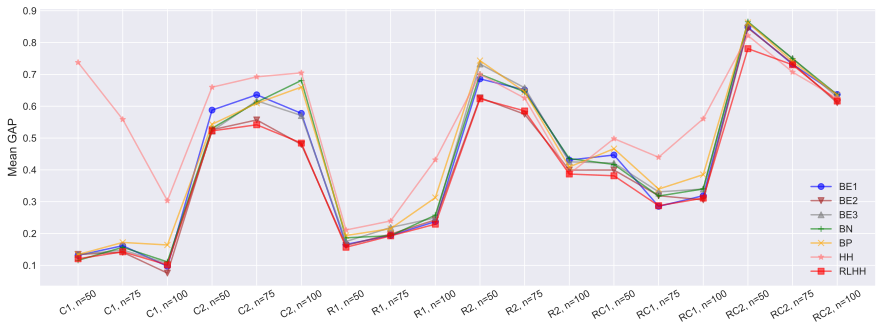

In [17]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 5))
for i, method in enumerate(df.columns[2:]):
    plt.plot(
        [f'{type}, n={n}' for type in ['C1', 'C2', 'R1', 'R2', 'RC1', 'RC2'] for n in [50, 75, 100]], 
        df[method], 
        color=['blue', 'brown', 'gray', 'green', 'orange', '#FF8080', 'red'][i], 
        marker=['o', 'v', '^', '+', 'x', '*', 's'][i], 
        label=method, 
        alpha=0.6
    )
plt.legend()
plt.xticks(rotation=30)
# plt.xlabel("Problem type and scale")
plt.ylabel("Mean GAP", fontsize=12)

ax = plt.gca()
plt.savefig("F:/Users/Documents/汇报/img/mean_gap.png", dpi=400, bbox_inches="tight")

## End

In [ ]:
def generateMatrix(n: int):
    l, r, t, b = 0, n - 1, 0, n - 1
    mat = [[0 for _ in range(n)] for _ in range(n)]
    num, tar = 1, n * n
    while num <= tar:
        for i in range(l, r + 1): # left to right
            mat[t][i] = num
            num += 1
        t += 1
        for i in range(t, b + 1): # top to bottom
            mat[i][r] = num
            num += 1
        r -= 1
        for i in range(r, l - 1, -1): # right to left
            mat[b][i] = num
            num += 1
        b -= 1
        for i in range(b, t - 1, -1): # bottom to top
            mat[i][l] = num
            num += 1
        l += 1
    return mat


In [168]:
def spiralOrder(matrix):
    out = []
    m = len(matrix)
    n = len(matrix[0])
    l, r, t, b = 0, n - 1, 0, m - 1
    while len(out) < m * n:
        # left -> right (从头到尾)
        for j in range(l, r + 1):
            out.append(matrix[t][j])
        t += 1
        print(out)
        # top to bottom
        for i in range(t, b + 1):
            out.append(matrix[i][r])
        r -= 1
        print(out)
        # right -> left
        for j in range(r, l - 1, -1):
            out.append(matrix[b][j])
        b -= 1
        print(out)
        # bottom to top
        for i in range(b, t - 1, -1):
            out.append(matrix[i][l])
        l += 1
        print(out)
        
    return out

In [169]:
print(spiralOrder([[1,2,3],[4,5,6],[7,8,9]]))
print(spiralOrder([[1,2,3,4],[5,6,7,8],[9,10,11,12]]))


[1, 2, 3]
[1, 2, 3, 6, 9]
[1, 2, 3, 6, 9, 8, 7]
[1, 2, 3, 6, 9, 8, 7, 4]
[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 4]
[1, 2, 3, 4, 8, 12]
[1, 2, 3, 4, 8, 12, 11, 10, 9]
[1, 2, 3, 4, 8, 12, 11, 10, 9, 5]
[1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7]
[1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7]
[1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7, 6]
[1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7, 6]
[1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7, 6]


In [50]:
11
[1,2,3,4,5]

[1]